#### Отметим, что из описания датасета можно сделать вывод, что в данном случае для машинного обучения значительно более важна метрика precision, чем метрика recall. 

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Датасет уже разбит на две выборки, поэтому для нашего анализа соберем их в одну таблицу:

In [164]:
dfTrain = pd.read_csv('aps_failure_training_set.csv', skiprows = 20 ,na_values = 'na', decimal = ',')

In [165]:
dfTest = pd.read_csv('aps_failure_test_set.csv', skiprows = 20 ,na_values = 'na', decimal = ',')

In [166]:
dfTrain.shape, dfTest.shape

((60000, 171), (16000, 171))

In [167]:
df = dfTrain.append(dfTest, ignore_index = True)

In [168]:
df.shape

(76000, 171)

In [169]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Посмотрим на распределение целевого признака. Видим большой дисбаланс классов.

In [170]:
vc=df['class'].value_counts()
vc

neg    74625
pos     1375
Name: class, dtype: int64

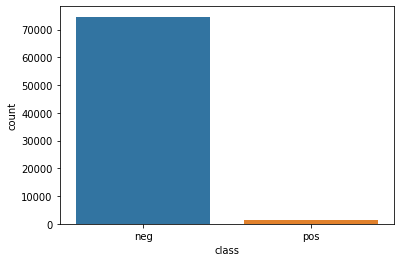

In [171]:
sns.countplot(df['class'])

## EDA

Вводим функцию для определения столбцов, в которых количество NaN превышает заданный порог:

In [172]:
# Функция возвращает список столбцов таблицы data, 
# в которых доля ячеек с NaN больше порога threshold
def DetectNaThr(data, threshold):
    rowNum = data.shape[0]
    rates = (data.isna().sum() / rowNum).sort_values(ascending = False)
    thrLen = len(rates[rates > threshold])
    dropList = rates.head(thrLen).index.tolist()
    return dropList

Удаляем столбцы, в которых NaN больше 40%

In [173]:
dropList0 = DetectNaThr(df, 0.4)

In [174]:
len(dropList0)

9

In [175]:
df0 = df.drop(labels = dropList0, axis = 1)

Удаляем строки, где есть NaN

In [176]:
df0.dropna(inplace = True)

In [177]:
df0.shape

(30858, 162)

Смотрим на 'выбросы'

In [178]:
ds = df0.describe(percentiles = [0.99])
ds

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,3.085800e+04,3.085800e+04,30858.000000,30858.000000,30858.000000,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,...,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,30858.000000,30858.000000
mean,6.746499e+04,4.941825e+08,726.797395,13.005898,20.807441,3.520657e+02,4.078028e+02,3.757194e+03,5.461633e+04,3.634072e+05,...,4.982059e+05,2.472399e+05,5.302253e+05,4.615703e+05,3.858235e+05,3.358649e+05,1.856189e+05,1.201115e+04,0.042128,0.318491
std,9.127003e+04,8.993144e+08,3944.739430,224.192103,288.848355,2.812134e+04,1.216986e+04,7.653326e+04,5.324198e+05,1.961659e+06,...,6.564383e+05,3.268332e+05,7.632769e+05,5.854349e+05,7.451858e+05,1.359892e+06,2.686022e+05,3.839477e+04,2.161941,14.138448
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,4.156100e+04,6.340000e+02,364.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.466000e+03,...,3.780400e+05,1.884980e+05,3.983830e+05,3.480210e+05,2.342920e+05,1.384900e+05,1.057360e+05,9.260000e+02,0.000000,0.000000
99%,5.203269e+05,2.130706e+09,5192.860000,326.000000,508.000000,0.000000e+00,0.000000e+00,4.204096e+04,1.388841e+06,6.825893e+06,...,2.387855e+06,1.204564e+06,2.451121e+06,2.296794e+06,3.386248e+06,4.481814e+06,1.197236e+06,1.565035e+05,0.000000,0.000000
max,1.675586e+06,2.130707e+09,612266.000000,21050.000000,20070.000000,3.376892e+06,1.150462e+06,6.531796e+06,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,3.411102e+07,2.811407e+07,1.195801e+08,8.291710e+06,2.528010e+06,340.000000,1720.000000


In [179]:
# Функция возвращает список столбцов таблицы data, 
# для которых отношение prst%-процентили к максимуму меньше eps
def DetectPrstThr(data, prst, eps):
    P1 = prst * 0.01
    rates = (data.quantile(P1) / data.max()).sort_values()
    thrLen = len(rates[rates < eps])
    dropList = rates.head(thrLen).index.tolist()
    return dropList

Удаляем столбцы, в которых отношение 99%-процентили к максимому меньше 0.01

In [180]:
dropListP = DetectPrstThr(df0, 99, 0.01)
dropListP.sort()
dropListP

['ad_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_009',
 'aj_000',
 'ak_000',
 'as_000',
 'at_000',
 'au_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_009',
 'az_007',
 'az_008',
 'az_009',
 'cf_000',
 'ch_000',
 'cn_000',
 'cn_009',
 'cs_007',
 'cs_008',
 'cs_009',
 'cy_000',
 'da_000',
 'df_000',
 'dg_000',
 'dh_000',
 'dj_000',
 'dk_000',
 'dl_000',
 'dm_000',
 'dz_000',
 'ea_000',
 'ef_000',
 'eg_000']

In [181]:
df1 = df0.drop(labels = dropListP, axis = 1)

In [182]:
dropColList = dropList0 + dropListP

In [183]:
len(dropColList)

49

In [184]:
df1.shape

(30858, 122)

In [185]:
df1.describe()

,aa_000,ac_000,ae_000,af_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
count,3.085800e+04,3.085800e+04,30858.000000,30858.000000,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,...,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04,3.085800e+04
mean,6.746499e+04,4.941825e+08,13.005898,20.807441,5.461633e+04,3.634072e+05,1.106402e+06,1.977229e+06,6.395040e+05,4.628441e+04,...,7.385971e+05,8.012806e+05,4.982059e+05,2.472399e+05,5.302253e+05,4.615703e+05,3.858235e+05,3.358649e+05,1.856189e+05,1.201115e+04
std,9.127003e+04,8.993144e+08,224.192103,288.848355,5.324198e+05,1.961659e+06,2.079584e+06,1.782247e+06,9.086916e+05,1.523869e+05,...,1.300878e+06,1.398907e+06,6.564383e+05,3.268332e+05,7.632769e+05,5.854349e+05,7.451858e+05,1.359892e+06,2.686022e+05,3.839477e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.852200e+04,2.560000e+02,0.000000,0.000000,0.000000e+00,8.585000e+02,2.291160e+05,1.246946e+06,2.312150e+05,7.042000e+03,...,3.166990e+05,4.125450e+05,2.812520e+05,1.370965e+05,2.786420e+05,2.445645e+05,1.515140e+05,6.737550e+04,1.138800e+04,0.000000e+00
50%,4.156100e+04,6.340000e+02,0.000000,0.000000,0.000000e+00,7.466000e+03,6.192450e+05,1.694579e+06,5.048040e+05,2.383900e+04,...,4.590280e+05,5.518760e+05,3.780400e+05,1.884980e+05,3.983830e+05,3.480210e+05,2.342920e+05,1.384900e+05,1.057360e+05,9.260000e+02
75%,6.175200e+04,3.800000e+03,0.000000,0.000000,0.000000e+00,8.293900e+04,1.281700e+06,2.309294e+06,8.183340e+05,5.293800e+04,...,7.488745e+05,8.517440e+05,5.507600e+05,2.785360e+05,6.197060e+05,5.222460e+05,3.783975e+05,2.378580e+05,2.583315e+05,9.454000e+03
max,1.675586e+06,2.130707e+09,21050.000000,20070.000000,6.340207e+07,2.288306e+08,1.791880e+08,7.763627e+07,6.334675e+07,1.590070e+07,...,7.498445e+07,9.822438e+07,7.793393e+07,3.775839e+07,9.715238e+07,3.411102e+07,2.811407e+07,1.195801e+08,8.291710e+06,2.528010e+06


Кодируем целевой признак:

In [186]:
df1 = pd.get_dummies(df1, columns=[target], drop_first=True)

In [187]:
df1.head()

,aa_000,ac_000,ae_000,af_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,class_pos
0,76698,2.130706e+09,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,...,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0
2,41040,2.280000e+02,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,...,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0
4,60874,1.368000e+03,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,...,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0
5,38312,2.130706e+09,0.0,0.0,0.0,9128.0,701702.0,1462836.0,449716.0,39000.0,...,481542.0,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0
7,102960,2.130706e+09,0.0,0.0,0.0,2130.0,142462.0,4227340.0,1674278.0,59718.0,...,907360.0,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0


Определяем список признаков, после выбрасывания которых в матрице корреляций все внедиагональные значения 
станут меньше 0.8:

In [188]:
def corr_feature_detect(data, target_variable, threshold=0.8):
    
    corrmat = data.drop(target_variable, axis=1).corr()

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [189]:
target = 'class_pos'

In [190]:
corrFeatures = corr_feature_detect(df1, target)

... и удаляем их:

In [191]:
dfLR = df1.drop(labels = corrFeatures, axis = 1)

In [192]:
dropColList = dropListP + corrFeatures

In [193]:
len(dropColList)

82

In [194]:
dfLR.shape

(30858, 80)

## ML

In [195]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [196]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}\n" +\
                 "Cohen Кappa: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    cohenkappa = cohen_kappa_score(prediction, actual)
       
    quality_list = [acc, precision, recall, f1, rocauc, cohenkappa]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            acc, precision, recall,
            f1, rocauc, cohenkappa))
        print("======================\n")
    
    return quality_list

#### Logistic Regression

In [197]:
X = dfLR.drop(labels = 'class_pos', axis = 1)

In [198]:
y = dfLR['class_pos']

In [199]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42, stratify = y)

In [200]:
# Нормализуем данные
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score, make_scorer

Применяем логистическую регрессию с  $L_1$-регуляризацией ($\lambda = 0.01,...,100$) и балансировкой (взвешиванием) классов.

In [202]:
modelLogRB = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100],
    penalty='l1', solver="liblinear", class_weight='balanced')
logRB = modelLogRB.fit(X_train_scaled, y_train)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [203]:
pred = modelLogRB.predict(X_test_scaled)
LogRBQuality = quality_report(pred, y_test)


=== Quality Report ===
Accuracy: 	 0.976
Precision: 	 0.892
Recall: 	 0.239
f1_score: 	 0.377
ROC-AUC: 	 0.619
Cohen Кappa: 	 0.369



Посмотрим на коэффициенты регрессии:

In [204]:
coefs = logRB.coef_[0]
len(coefs[coefs == 0.])

2

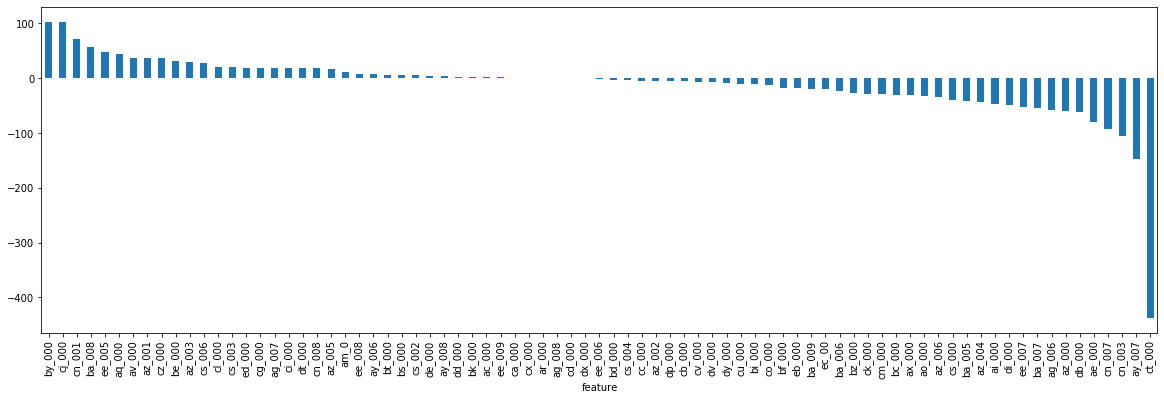

In [205]:
fW = pd.DataFrame({'feature': X.columns, 'weight': logRB.coef_[0]})
fW.set_index('feature', inplace=True)
fW.sort_values(["weight"], ascending=False, inplace=True)
fW["weight"].plot(kind ='bar', figsize = (20, 6));

#### Попробуем сократить количество признаков

Выделим те коэффициенты, у которых абсолютное значение больше 15: 

In [206]:
fW.shape

(79, 1)

In [210]:
fW_ = fW[abs(fW['weight'])>15]

In [211]:
fWList = fW_.index.tolist()
len(fWList)

48

In [212]:
XShort = dfLR[fWList]

In [213]:
X_train, X_test, y_train, y_test = train_test_split (XShort, y, test_size = 0.3, random_state = 42, stratify = y)

In [214]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [215]:
modelLogRBShort = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100],
    penalty='l1', solver="liblinear", class_weight='balanced')
logRBShort = modelLogRB.fit(X_train_scaled, y_train)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [216]:
pred = modelLogRB.predict(X_test_scaled)
LogRBQuality = quality_report(pred, y_test)


=== Quality Report ===
Accuracy: 	 0.981
Precision: 	 0.892
Recall: 	 0.281
f1_score: 	 0.427
ROC-AUC: 	 0.640
Cohen Кappa: 	 0.420



In [217]:
coefs = logRBShort.coef_[0]
len(coefs[coefs == 0.])

0

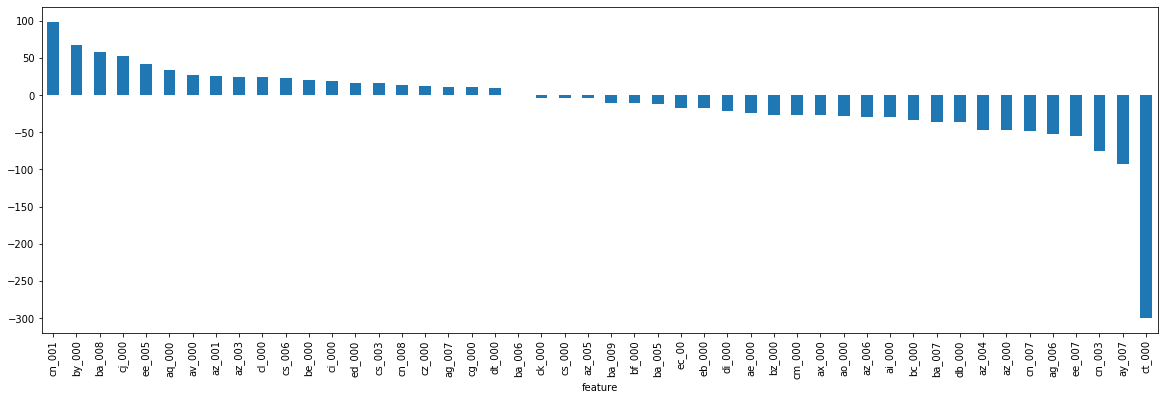

In [218]:
fW = pd.DataFrame({'feature': XShort.columns, 'weight': logRBShort.coef_[0]})
fW.set_index('feature', inplace=True)
fW.sort_values(["weight"], ascending=False, inplace=True)
fW["weight"].plot(kind ='bar', figsize = (20, 6));

Итак, мы сократили количество признаков примерно на 40\% и сохранили метрики качества обучения.

#### kNN

In [219]:
X = df1.drop(labels = 'class_pos', axis = 1)

In [220]:
y = df1['class_pos']

In [221]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42, stratify = y)

In [222]:
from sklearn.neighbors import KNeighborsClassifier

Для обучения модели $k$ ближайших соседей возьмем $k = 1,3,5$, а дистанцию будем мерить по норме пространств $l_p$, $p =1,2,3,4$:

In [229]:
from sklearn.model_selection import GridSearchCV
param_grid = {
        'n_neighbors': [1,3,5],
        'p': [1,2]
}

knn = KNeighborsClassifier()



In [231]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [232]:
best_n_neighbors = grid_search.best_estimator_.n_neighbors
print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, best_n_neighbors)) 


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Best CV score: 0.842, best CV k: 5
Resulting test score: 0.536


In [233]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)


In [234]:
knnQuality = quality_report(pred, y_test)


=== Quality Report ===
Accuracy: 	 0.994
Precision: 	 0.365
Recall: 	 0.675
f1_score: 	 0.474
ROC-AUC: 	 0.835
Cohen Кappa: 	 0.471



Здесь получили низкий precision, что, по-видимому говорит о том, что метод KNN плохо подходит.